# T2.5 MLE, minimización del riesgo empírico y regularización

**Índice**

> 1 Estimación máximo-verosímil<br>
>> 1.1 Definición<br>
>>> 1.1.1 Estimador máximo-verosímil (MLE)<br>
>>> 1.1.2 MLE con la conjunta<br>
>>
>> 1.2 MLE para la Bernoulli (incondicional)<br>
>> 1.3 MLE para la categórica (incondicional)<br>
>> 1.4 MLE para la Gaussiana univariada (incondicional)<br>
>> 1.5 MLE para la Gaussiana multivariada (incondicional)<br>
>> 1.6 MLE para regresión (homocedástica) lineal (condicional)<br>
>
> 2 Minimización del riesgo empírico<br>
>> 2.1 Definición y ejemplo: minimizar el error de clasificación<br>
>>> 2.1.1 Definición<br>
>>> 2.1.2 Ejemplo: minimizar el error de clasificación<br>
>>
>> 2.2 Pérdida subrogada<br>
>>> 2.2.1 Caso binario<br>
>
> 3 Regularización<br>
>> 3.1 Definición<br>
>>> 3.1.1 Regularización<br>
>>> 3.1.2 Estimación maximum a posteriori (MAP)<br>
>>
>> 3.2 Elección del regularizador mediante validación<br>
>> 3.3 Validación cruzada<br>
>>> 3.3.1 La regla "un error estándar"<br>
>>> 3.3.2 Ejemplo: regresión de cresta<br>
>>
>> 3.4 Terminación temprana<br>
>> 3.5 Uso de más datos<br>

# 1 Estimación máximo-verosímil

## 1.1 Definición

### 1.1.1 Estimador máximo-verosímil (MLE)

**Estimador máximo-verosímil (MLE):**  $\;$ de un vector de parámetros $\;\boldsymbol{\theta}$ con respecto a un conjunto de $N$ datos $\;\mathcal{D}=\{(\boldsymbol{x}_n,\boldsymbol{y}_n)\}$ independientes e idénticamente distribuidos según una fdp (o fp) $\;p(\boldsymbol{y}\mid\boldsymbol{x}, \boldsymbol{\theta})$
$$\begin{align*}
\hat{\boldsymbol{\theta}}_{\text{mle}}%
&=\operatorname*{argmax}\limits_{\boldsymbol{\theta}}\; \operatorname{L}(\boldsymbol{\theta})%
\quad\text{con}\quad%
\operatorname{L}(\boldsymbol{\theta})%
=p(\mathcal{D}\mid\boldsymbol{\theta})%
=\prod_{n=1}^N \;p(\boldsymbol{y}_n\mid\boldsymbol{x}_n, \boldsymbol{\theta})\\%
&=\operatorname*{argmax}\limits_{\boldsymbol{\theta}}\; \operatorname{LL}(\boldsymbol{\theta})%
\quad\text{con}\quad%
\operatorname{LL}(\boldsymbol{\theta})%
=\log \operatorname{L}(\boldsymbol{\theta})%
=\sum_{n=1}^N \;\log p(\boldsymbol{y}_n\mid\boldsymbol{x}_n, \boldsymbol{\theta})\\%
&=\operatorname*{argmin}\limits_{\boldsymbol{\theta}}\; \operatorname{NLL}(\boldsymbol{\theta})%
\quad\text{con}\quad%
\operatorname{NLL}(\boldsymbol{\theta})%
=-\operatorname{LL}(\boldsymbol{\theta})%
=-\sum_{n=1}^N \;\log p(\boldsymbol{y}_n\mid\boldsymbol{x}_n, \boldsymbol{\theta})
\end{align*}$$

### 1.1.2 MLE con la conjunta

**MLE con la conjunta:** $\;$ de un vector de parámetros $\;\boldsymbol{\theta}$ con respecto a un conjunto de $N$ datos $\;\mathcal{D}=\{(\boldsymbol{x}_n,\boldsymbol{y}_n)\}$ independientes e idénticamente distribuidos según una fdp (o fp) $\;p(\boldsymbol{x}, \boldsymbol{y}\mid\boldsymbol{\theta})$
$$\hat{\boldsymbol{\theta}}_{\text{mle}}=\operatorname*{argmin}\limits_{\boldsymbol{\theta}}-\sum_{n=1}^N \log p(\boldsymbol{x}_n,\boldsymbol{y}_n\mid\boldsymbol{\theta})$$

**El MLE con la conjunta es distinto del MLE (con la condicional):**
$$\begin{align*}
\hat{\boldsymbol{\theta}}_{\text{mle}}%
&=\operatorname*{argmin}\limits_{\boldsymbol{\theta}} -\sum_{n=1}^N \log p(\boldsymbol{y}_n\mid\boldsymbol{x}_n,\boldsymbol{\theta})\\%
&=\operatorname*{argmin}\limits_{\boldsymbol{\theta}} -\sum_{n=1}^N \log %
\frac{p(\boldsymbol{x}_n,\boldsymbol{y}_n\mid\boldsymbol{\theta})}{p(\boldsymbol{x}_n\mid\boldsymbol{\theta})}\\%
&=\operatorname*{argmin}\limits_{\boldsymbol{\theta}} -\sum_{n=1}^N \log p(\boldsymbol{x}_n,\boldsymbol{y}_n\mid\boldsymbol{\theta})%
\underbrace{-\log p(\boldsymbol{x}_n\mid\boldsymbol{\theta})}_{\text{depende de toda $\boldsymbol{y}$}}%
\end{align*}$$

**Cálculo del MLE con la conjunta para clasificación en clases de parámetros independientes:** $\;1+C\,$ problemas independientes

Si $\,y\in\{1,\dotsc,C\}\;$ y $\;\boldsymbol{\theta}=(\{\pi_c\},\{\boldsymbol{\theta}_c\})\;$ con $\;p(y=c\mid\boldsymbol{\theta})=\pi_c\;$ y $\;p(\boldsymbol{x}\mid y=c,\boldsymbol{\theta})=p(\boldsymbol{x}\mid\boldsymbol{\theta}_c),\;$ entonces:
$$\begin{align*}
\hat{\boldsymbol{\theta}}_{\text{mle}}%
&=\operatorname*{argmin}\limits_{\boldsymbol{\theta}} %
-\sum_{n=1}^N \log p(\boldsymbol{x}_n,y_n\mid\boldsymbol{\theta})\\%
&=\operatorname*{argmin}\limits_{\boldsymbol{\theta}} %
-\sum_{n=1}^N \log p(y_n\mid\{\pi_c\})-\sum_{c=1}^C\sum_{n:y_n=c}\log p(\boldsymbol{x}_n\mid\boldsymbol{\theta}_c)%
=\{\hat{\pi}_c\},\{\hat{\boldsymbol{\theta}}_c\}\\[5mm]%
\{\hat{\pi}_c\}%
&=\operatorname*{argmin}\limits_{\{\pi_c\}}-\sum_{n=1}^N \log p(y_n\mid\{\pi_c\})%
\;\to\;\hat{\pi}_c=\frac{N_c}{N}\\
\hat{\boldsymbol{\theta}}_c%
&=\operatorname*{argmin}\limits_{\boldsymbol{\theta}_c} %
-\sum_{n:y_n=c}\log p(\boldsymbol{x}_n\mid\boldsymbol{\theta}_c) \qquad(c=1,\dotsc,C)
\end{align*}$$

## 1.2 MLE para la Bernoulli (incondicional)

**Datos:** $\quad\mathcal{D}=\{y_1,\ldots,y_N\},\quad p(y_n\mid\theta)=\operatorname{Ber}(y\mid\theta)$

**NLL:** $\;$ de $\theta$ con respecto a $\mathcal{D}$
$$\begin{align*}
\operatorname{NLL}(\theta)&=-\log\prod_{n=1}^N p(y_n\mid\theta)%
=-\log\prod_{n=1}^N \theta^{\mathbb{I}(y_n=1)}(1-\theta)^{\mathbb{I}(y_n=0)}\\%
&=-\sum_{n=1}^N \mathbb{I}(y_n=1)\log\theta + \mathbb{I}(y_n=0)\log(1-\theta)\\%
&=-[N_1\log\theta+N_0\log(1-\theta)]%
\quad\text{con}\quad%
N_1=\sum_n\mathbb{I}(y_n=1)%
\quad\text{y}\quad%
N_0=\sum_n\mathbb{I}(y_n=0)
\end{align*}$$

**Estadísticos suficientes (de los datos):** $\;N_1$ y $N_0$ resumen todo lo que necesitamos saber sobre $\mathcal{D}$

**Derivada de la NLL:**
$$\frac{d}{d\theta}\operatorname{NLL}(\theta)=\frac{-N_1}{\theta}+\frac{N_0}{1-\theta}$$

**MLE:** $\;$ se obtiene igualando la derivada a cero
$$\hat{\theta}=\dfrac{N_1}{N}$$

**Ejemplo:** $\;$ MLE de $\,\theta\,$ con $\,N=100\,$ datos iid según una $\,\operatorname{Ber}(y\mid\theta=0.20)$

In [1]:
from scipy.stats import bernoulli
t, N = 0.20, 100; Y = bernoulli(t).rvs(N, random_state=23); print(f'Y = {Y}')
ht = Y.mean(); print(f'ht = {ht:.2f}')

Y = [0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
ht = 0.22


## 1.3 MLE para la categórica (incondicional)

**Datos:** $\quad\mathcal{D}=\{y_1,\ldots,y_N\},\quad p(y_n\mid\boldsymbol{\theta})=\operatorname{Cat}(y\mid\boldsymbol{\theta})$

**NLL:** $\;$ de $\theta$ con respecto a $\mathcal{D}$
$$\begin{align*}
\operatorname{NLL}(\boldsymbol{\theta})&=-\log\prod_{n=1}^N p(y_n\mid\boldsymbol{\theta})%
=-\log\prod_{n=1}^N\prod_{c=1}^C \theta_c^{\mathbb{I}(y_n=c)}\\%
&=-\sum_{n=1}^N\sum_{c=1}^C \mathbb{I}(y_n=c)\log\theta_c%
=-\sum_{c=1}^C N_c\log\theta_c%
\quad\text{con}\quad%
N_c=\sum_n\mathbb{I}(y_n=c)%
\end{align*}$$

**Estadísticos suficientes (de los datos):** $\;\{N_c\}$

**Lagrangiana:** $\;$ NLL y la restricción "$1-\sum_c\theta_c=0$" añadida junto con un multiplicador de Lagrange $\lambda$
$$\mathcal{L}(\boldsymbol{\theta},\lambda)=-\sum_c N_c\log\theta_c-\lambda\left(1-\sum_c\theta_c\right)$$

**Gradiente de la Lagrangiana:**
$$\frac{\partial\mathcal{L}}{\partial\theta_c}=-\frac{N_c}{\theta_c}%
\quad\text{y}\quad%
\frac{\partial\mathcal{L}}{\lambda}=-1+\sum_c\theta_c$$

**MLE:** $\;$ se obtiene igualando el gradiente de la Lagrangiana a cero
$$\hat{\theta}_c=\dfrac{N_c}{N}$$

**Ejemplo:** $\;$ MLE de $\,\boldsymbol{\theta}\,$ con $\,N=100\,$ datos iid según una $\,\operatorname{Cat}(y\mid\boldsymbol{\theta}),\,\boldsymbol{\theta}=(0.3, 0.2, 0.5)^t$

In [1]:
from scipy.stats import multinomial
t, N = [0.3, 0.2, 0.5], 100; Y = multinomial(N, t).rvs(N, random_state=23)
ht = Y.mean(axis=0) / N; print(f'Y[:5,:] = {Y[:5,:]}\nht = {ht}')

Y[:5,:] = [[30 26 44]
 [33 17 50]
 [26 23 51]
 [26 20 54]
 [31 19 50]]
ht = [0.2983 0.1992 0.5025]


## 1.4 MLE para la Gaussiana univariada (incondicional)

**Datos:** $\quad\mathcal{D}=\{y_1,\ldots,y_N\},\quad p(y_n\mid\boldsymbol{\theta})=\mathcal{N}(y\mid\mu, \sigma^2)$

**NLL:** $\;$ de $\boldsymbol{\theta}=(\mu, \sigma^2)^t$ con respecto a $\mathcal{D}$
$$\begin{align*}
\operatorname{NLL}(\mu, \sigma^2)&=-\sum_n\log\left[\left(\frac{1}{2\pi\sigma^2}\right)^{\frac{1}{2}}%
    \exp\left(-\frac{1}{2\sigma^2}(y_n-\mu)^2\right)\right]\\%
  &=\frac{N}{2}\log(2\pi\sigma^2)+\frac{1}{2\sigma^2}\sum_n(y_n-\mu)^2
\end{align*}$$

**MLE:** $\;$ se obtiene igualando el gradiente de la NLL a cero
$$\begin{align*}
\frac{\partial\operatorname{NLL}}{\partial\mu}%
&=\frac{1}{\sigma^2}\sum_n(\mu-y_n)%
=\frac{N}{\sigma^2}(\mu-\bar{y})\Bigr\vert_{\hat{\boldsymbol{\theta}}}=0%
\;\to\;\hat{\mu}=\bar{y}\\%
\frac{\partial\operatorname{NLL}}{\partial\sigma}%
&=\frac{N}{\sigma}-\frac{1}{\sigma^3}\sum_n(y_n-\mu)^2\Bigr\vert_{\hat{\boldsymbol{\theta}}}=0%
\;\to\;\hat{\sigma}^2=\frac{1}{N}\sum_n(y_n-\hat{\mu})^2%
\end{align*}$$

**Estadísticos suficientes:** $\;$ la media empírica $\,\bar{y}\,$ y la media de cuadrados empírica, $\,s^2,\,$ pues $\,\hat{\sigma}^2=s^2-\bar{y}^2$

**Ejemplo:** $\;$ MLE de $\,\boldsymbol{\theta}\,$ con $\,N=100\,$ datos iid según una $\,\mathcal{N}(y\mid\mu,\sigma^2),\,\mu=0, \sigma^2=1$

In [1]:
import numpy as np; from scipy.stats import norm
m, v, N = 0.0, 1.0, 100; Y = norm(m, v).rvs(N, random_state=23)
hm = Y.mean() / N; s2 = np.square(Y).mean(); hv = s2 - hm * hm
print(f'm = {m:.4f}  v = {v:.4f}  hm = {hm:.4f}  hv = {hv:.4f}')

m = 0.0000  v = 1.0000  hm = 0.0011  hv = 0.9063


## 1.5 MLE para la Gaussiana multivariada (incondicional)

**Datos:** $\quad\mathcal{D}=\{\boldsymbol{y}_1,\ldots,\boldsymbol{y}_N\},\quad p(\boldsymbol{y}_n\mid\boldsymbol{\theta})=\mathcal{N}(\boldsymbol{y}\mid\boldsymbol{\mu}, \mathbf{\Sigma})$

**NLL:** $\;$ de $\boldsymbol{\theta}=(\operatorname{vec}(\boldsymbol{\mu});\operatorname{vec}(\mathbf{\Sigma}))$ con respecto a $\mathcal{D}$
$$\begin{align*}
\operatorname{NLL}(\boldsymbol{\theta})%
&=-\sum_n\log\left[(2\pi)^{-D/2}\lvert\mathbf{\Sigma}\rvert^{-1/2}\exp\left(%
-\frac{1}{2}(\boldsymbol{y}_n-\boldsymbol{\mu})^t\mathbf{\Sigma}^{-1}(\boldsymbol{y}_n-\boldsymbol{\mu})\right)\right]\\
&=\underbrace{-\frac{ND}{2}\log(2\pi)}_{\text{constante irrelevante}}+\frac{N}{2}\log\lvert\mathbf{\Sigma}\rvert%
+\frac{1}{2}\sum_n(\boldsymbol{y}_n-\boldsymbol{\mu})^t\mathbf{\Sigma}^{-1}(\boldsymbol{y}_n-\boldsymbol{\mu})
\end{align*}$$

**MLE de $\boldsymbol{\mu}$:** $\;$ ver [Scalar-by-vector identities (en formato numerador)](https://en.wikipedia.org/wiki/Matrix_calculus#Scalar-by-vector_identities)
$$\begin{align*}
\frac{\partial\operatorname{NLL}}{\partial\boldsymbol{\mu}^t}&=\frac{1}{2}\sum_n\frac{\partial(\boldsymbol{y}_n-\boldsymbol{\mu})^t\mathbf{\Sigma}^{-1}(\boldsymbol{y}_n-\boldsymbol{\mu})}{\partial\boldsymbol{\mu}^t}\\
&=\frac{1}{2}\sum_n(\boldsymbol{y}_n-\boldsymbol{\mu})^t\mathbf{\Sigma}^{-1}\frac{\partial(\boldsymbol{y}_n-\boldsymbol{\mu})}{\partial\boldsymbol{\mu}^t}+(\boldsymbol{y}_n-\boldsymbol{\mu})^t\mathbf{\Sigma}^{-t}\frac{\partial(\boldsymbol{y}_n-\boldsymbol{\mu})}{\partial\boldsymbol{\mu}^t}\\
&=\frac{1}{2}\sum_n-2\mathbf{\Sigma}^{-1}(\boldsymbol{y}_n-\boldsymbol{\mu})\\%
&=-\mathbf{\Sigma}^{-1}\sum_n(\boldsymbol{y}_n-\boldsymbol{\mu})\Bigr\vert_{\hat{\boldsymbol{\theta}}}=\boldsymbol{0}%
\;\to\;\hat{\boldsymbol{\mu}}=\bar{\boldsymbol{y}}%
\end{align*}$$

**MLE de $\mathbf{\Sigma}$:** $\;$ ver [Scalar-by-matrix identities (en formato numerador)](https://en.wikipedia.org/wiki/Matrix_calculus#Scalar-by-matrix_identities)
$$\begin{align*}
\frac{\partial\operatorname{NLL}}{\partial\mathbf{\Sigma}}%
&=\frac{N}{2}\mathbf{\Sigma}^{-1}+\frac{1}{2}\sum_n\frac{\partial(\boldsymbol{y}_n-\boldsymbol{\mu})^t\mathbf{\Sigma}^{-1}(\boldsymbol{y}_n-\boldsymbol{\mu})}{\partial\mathbf{\Sigma}}\\
&=\frac{N}{2}\mathbf{\Sigma}^{-1}+\frac{1}{2}\sum_n\frac{\partial\operatorname{tr}(\mathbf{\Sigma}^{-1}(\boldsymbol{y}_n-\boldsymbol{\mu})(\boldsymbol{y}_n-\boldsymbol{\mu})^t)}{\partial\mathbf{\Sigma}}\\
&=\frac{N}{2}\mathbf{\Sigma}^{-1}+\frac{1}{2}\sum_n-\mathbf{\Sigma}^{-1}(\boldsymbol{y}_n-\boldsymbol{\mu})(\boldsymbol{y}_n-\boldsymbol{\mu})^t\mathbf{\Sigma}^{-1}\Bigr\vert_{\hat{\boldsymbol{\theta}}}=\mathbf{0}\\%
&\to\;N\hat{\mathbf{\Sigma}}^{-1}=\hat{\mathbf{\Sigma}}^{-1}\sum_n(\boldsymbol{y}_n-\hat{\boldsymbol{\mu}})(\boldsymbol{y}_n-\hat{\boldsymbol{\mu}})^t\hat{\mathbf{\Sigma}}^{-1}\\
&\to\;\hat{\mathbf{\Sigma}}=\frac{1}{N}\sum_n(\boldsymbol{y}_n-\hat{\boldsymbol{\mu}})(\boldsymbol{y}_n-\hat{\boldsymbol{\mu}})^t
\end{align*}$$

**Estadísticos suficientes:** $\;\,\bar{y}\,$ y $\,\displaystyle\sum_n\boldsymbol{y}_n\boldsymbol{y}_n^t\,$ pues $\,\displaystyle\hat{\mathbf{\Sigma}}=\frac{1}{N}\sum_n\boldsymbol{y}_n\boldsymbol{y}_n^t-\hat{\boldsymbol{\mu}}\hat{\boldsymbol{\mu}}^t$

**Ejemplo:** $\;$ MLE de $\,\boldsymbol{\theta}\,$ con $\,N=10000\,$ datos iid según una $\,\mathcal{N}(\boldsymbol{y}\mid\boldsymbol{\mu},\mathbf{\Sigma}),\,\boldsymbol{\mu}=\boldsymbol{0},\,\mathbf{\Sigma}=[2, 1.8; 1.8, 2]$

In [1]:
import numpy as np; from scipy.stats import multivariate_normal
m = np.array([.0, .0]); S = np.array([[2., 1.8], [1.8, 2.]]); N = 10000
Y = multivariate_normal(mean=m, cov=S).rvs(N, random_state=23)
hm = Y.mean(axis=0); hS = np.dot(Y.T, Y) / N - np.dot(hm.T, hm)
print(f'hm = {hm}\nhS = {hS}\nnp.cov = {np.cov(Y, rowvar=False, bias=True)}')

hm = [0.03462052 0.0341259 ]
hS = [[1.97661038 1.77726855]
 [1.77726855 1.98550169]]
np.cov = [[1.97777495 1.77845025]
 [1.77845025 1.98670027]]


## 1.6 MLE para regresión (homocedástica) lineal (condicional)

**Datos:** $\quad\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\},\quad p(y_n\mid\boldsymbol{x}_n,\boldsymbol{\theta})=\mathcal{N}(y_n\mid\boldsymbol{w}^t\boldsymbol{x}_n, \sigma^2),\;\sigma^2\,$ fija 

**NLL:** $\;$ de $\boldsymbol{w}$ con respecto a $\mathcal{D}$
$$\begin{align*}
\operatorname{NLL}(\boldsymbol{w})&=-\sum_n\log\left[\left(\frac{1}{2\pi\sigma^2}\right)^{\frac{1}{2}}%
    \exp\left(-\frac{1}{2\sigma^2}(y_n-\boldsymbol{w}^t\boldsymbol{x}_n)^2\right)\right]\\%
  &=\frac{N}{2}\log(2\pi\sigma^2)+\frac{1}{2\sigma^2}\sum_n(y_n-\boldsymbol{w}^t\boldsymbol{x}_n)^2
\end{align*}$$

**Residual sum of squares (RSS):** $\;$ equivalente a la NLL
$$\operatorname{RSS}(\boldsymbol{w})=\sum_n r_n^2%
\quad\text{con}\quad r_n=y_n-\boldsymbol{w}^t\boldsymbol{x}_n$$

**Mean squared error (MSE) y root MSE (RMSE):** $\;$ equivalentes a la NLL y RSS
$$\operatorname{MSE}(\boldsymbol{w})=\frac{1}{N}\operatorname{RSS}(\boldsymbol{w})%
\quad\text{y}\quad%
\operatorname{RMSE}(\boldsymbol{w})=\sqrt{\operatorname{MSE}(\boldsymbol{w})}$$

**MLE de $\boldsymbol{w}$:** $\;$ con notación matricial, $\,\mathbf{X}=[\boldsymbol{x}_1^t;\ldots;\boldsymbol{x}_N^t]\;$ y $\;\boldsymbol{y}=(y_1,\dotsc,y_N)^t$ 
$$\begin{align*}
\frac{\partial\operatorname{RSS}}{\partial\boldsymbol{w}^t}%
&=\frac{\partial(\boldsymbol{y}-\mathbf{X}\boldsymbol{w})^t(\boldsymbol{y}-\mathbf{X}\boldsymbol{w})}{\partial\boldsymbol{w}^t}\\
&=\frac{\partial(\boldsymbol{y}^t-\boldsymbol{w}^t\mathbf{X}^t)(\boldsymbol{y}-\mathbf{X}\boldsymbol{w})}{\partial\boldsymbol{w}^t}\\
&=\frac{\partial(\boldsymbol{y}^t\boldsymbol{y}-2\boldsymbol{w}^t\mathbf{X}^t\boldsymbol{y}+\boldsymbol{w}^t\mathbf{X}^t\mathbf{X}\boldsymbol{w})}{\partial\boldsymbol{w}^t}\\
&=-2\mathbf{X}^t\boldsymbol{y}+2\mathbf{X}^t\mathbf{X}\boldsymbol{w}\vert_{\hat{\boldsymbol{w}}}=\boldsymbol{0}\\%
&\;\to\mathbf{X}^t\mathbf{X}\hat{\boldsymbol{w}}=\mathbf{X}^t\boldsymbol{y}\;\to\hat{\boldsymbol{w}}=(\mathbf{X}^t\mathbf{X})^{-1}\mathbf{X}^t\boldsymbol{y}
\end{align*}$$

**Ordinary least squares (OLS):** $\;$ nombre usual que se la da al MLE de $\boldsymbol{w}$

**Ejemplo:** $\;p(y_n\mid x_n,m,c,\sigma^2)=\mathcal{N}(y_n\mid mx_n + c, \sigma^2),\,\mathcal{D}=\{(x_n,y_n)\}=\{(0,0),(1,0.5),(1,1.5),(2,2)\}$

$$\begin{align*}
\boldsymbol{w}&=(c, m)^t\qquad\mathbf{X}=[1, 0; 1, 1; 1, 1; 1, 2]\qquad\boldsymbol{y}=(0,1/2,3/2,2)\\
\mathbf{X}^t\mathbf{X}&=\begin{pmatrix}1&1&1&1\\0&1&1&2\end{pmatrix}\begin{pmatrix}1&0\\1&1\\1&1\\1&2\end{pmatrix}=\begin{pmatrix}4&4\\4&6\end{pmatrix}\\
(\mathbf{X}^t\mathbf{X})^{-1}&=\frac{1}{8}\begin{pmatrix}4&4\\4&6\end{pmatrix}=\begin{pmatrix}3/4&-1/2\\1/2&1/2\end{pmatrix}\\
(\mathbf{X}^t\mathbf{X})^{-1}\mathbf{X}^t&=\begin{pmatrix}3/4&-1/2\\1/2&1/2\end{pmatrix}\begin{pmatrix}1&1&1&1\\0&1&1&2\end{pmatrix}=\begin{pmatrix}3/4&1/4&1/4&-1/4\\-1/2&0&0&-1/2\end{pmatrix}\\
\hat{\boldsymbol{w}}&=\begin{pmatrix}3/4&1/4&1/4&-1/4\\-1/2&0&0&-1/2\end{pmatrix}\begin{pmatrix}0\\1/2\\3/2\\2\end{pmatrix}=(0,1)^t\\
\hat{\boldsymbol{y}}&=\mathbf{X}\hat{\boldsymbol{w}}=\begin{pmatrix}1&0\\1&1\\1&1\\1&2\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix}=\begin{pmatrix}0\\1\\1\\2\end{pmatrix}\\
\operatorname{RSS}(\hat{\boldsymbol{w}})&=(\boldsymbol{y}-\hat{\boldsymbol{y}})^t(\boldsymbol{y}-\hat{\boldsymbol{y}})=(0,1/2,-1/2,0)(0,1/2,-1/2,0)^t=1/2
\end{align*}$$

hw = [0. 1.] RSS = 0.5
np.linalg.lstsq: hw = [0. 1.] RSS = 0.5


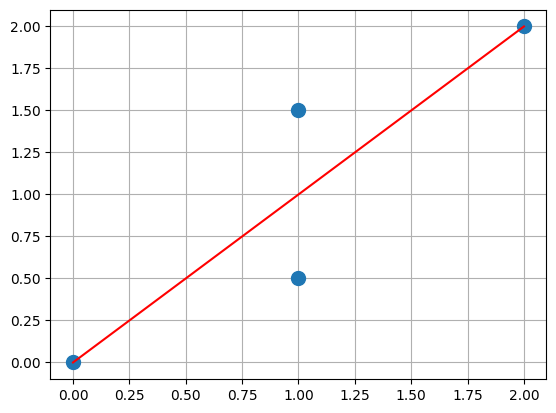

In [1]:
import numpy as np; import matplotlib.pyplot as plt
X = np.array([0.0, 1.0, 1.0, 2.0]); N = len(X); Xh = np.c_[np.ones(N), X]
y = np.array([0.0, 0.5, 1.5, 2.0]); hw = np.linalg.inv(Xh.T @ Xh) @ Xh.T @ y
y_pred = Xh @ hw; RSS = np.square(y - y_pred).sum(); print(f'hw = {hw} RSS = {RSS}')
[m, c], [r], _, _ = np.linalg.lstsq(np.c_[X, np.ones(N)], y, rcond=None)
print(f'np.linalg.lstsq: hw = {hw} RSS = {RSS}')
plt.plot(X, y, 'o', markersize=10); plt.plot(X, m*X + c, 'r'); plt.grid(True)

# 2 Minimización del riesgo empírico

## 2.1 Definición y ejemplo: minimizar el error de clasificación

### 2.1.1 Definición

**MLE:** $\;$ minimiza la neg-log-verosimilitud
$$\hat{\boldsymbol{\theta}}_{\text{mle}}=\operatorname*{argmin}_{\boldsymbol{\theta}}\mathcal{L}(\boldsymbol{\theta})%
\quad\text{con}\quad%
\mathcal{L}(\boldsymbol{\theta})%
=\frac{1}{N}\sum_{n=1}^N \;-\log p(\boldsymbol{y}_n\mid\boldsymbol{x}_n, \boldsymbol{\theta})$$
**Empirical risk minimization (ERM):** $\;$ generaliza MLE sustituyendo la log-pérdida por una pérdida genérica
$$\hat{\boldsymbol{\theta}}_{\text{erm}}=\operatorname*{argmin}_{\boldsymbol{\theta}}\mathcal{L}(\boldsymbol{\theta})%
\quad\text{con}\quad%
\mathcal{L}(\boldsymbol{\theta})%
=\frac{1}{N}\sum_{n=1}^N\ell(\boldsymbol{y}_n, \boldsymbol{\theta}; \boldsymbol{x}_n)$$

### 2.1.2 Ejemplo: minimizar el error de clasificación

**Pérdida 01 de un clasificador $f(\boldsymbol{x}_n; \boldsymbol{\theta}):$**
$$\ell_{01}(\boldsymbol{y}_n, \boldsymbol{\theta}; \boldsymbol{x}_n)%
=\begin{cases}
0 & \text{si $\boldsymbol{y}_n=f(\boldsymbol{x}_n; \boldsymbol{\theta}$})\\%
1 & \text{si $\boldsymbol{y}_n\neq f(\boldsymbol{x}_n;\boldsymbol{\theta})$}%
\end{cases}$$

**Riesgo empírico con pérdida 01:** $\;$ es el **error de clasificación** (en entrenamiento)
$$\mathcal{L}_{01}(\boldsymbol{\theta})%
=\frac{1}{N}\sum_{n=1}^N\ell_{01}(\boldsymbol{y}_n, \boldsymbol{\theta}; \boldsymbol{x}_n)$$

**Caso binario:** $\;$ si las clases son $\{-1,+1\}\,$ y la predicción $\,\hat{y}_n=f(\boldsymbol{x}_n;\boldsymbol{\theta})$
$$\mathcal{L}_{01}(\boldsymbol{\theta})%
=\frac{1}{N}\sum_{n=1}^N\ell_{01}(y_n,\hat{y}_n)%
=\frac{1}{N}\sum_{n=1}^N\mathbb{I}(y_n\hat{y}_n<0)$$

## 2.2 Pérdida subrogada

**Surrogate loss function:** $\;$ cota superior de la pérdida 01 que sea ajustada y más fácil de optimizar

### 2.2.1 Caso binario

**Clasificador binario:** $\;$ de log-odds $\,\eta=f(\boldsymbol{x}; \boldsymbol{\theta})$ para etiquetas $\,\tilde{y}\in\{-1, 1\}$
$$p(\tilde{y}\mid\boldsymbol{x},\boldsymbol{\theta})=\sigma(\tilde{y}\eta)=\frac{1}{1+e^{-\tilde{y}\eta}}$$

**Pérdida 01 en el caso binario:** $\;\ell_{01}(\tilde{y},\eta)=\mathbb{I}(\tilde{y}\eta<0)$

**Margen de seguridad $\,\tilde{y}\eta$:** $\;$ positivo para que no haya error de clasificación; cuanto mayor sea, mayor seguridad del clasificador

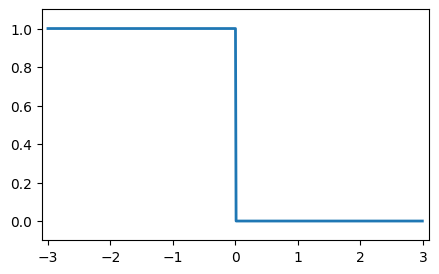

In [1]:
import numpy as np; import matplotlib.pyplot as plt
x = np.arange(-3, 3, .01); fig = plt.figure(figsize=(5, 3))
plt.axis([-3.1, 3.1, -0.1, 1.1]); plt.plot(x, x <= 0, linewidth=2);

**Incovenientes de la pérdida 01:** $\;$ discontinua en $0$ e ignora el margen de seguridad

**Pérdidas subrogadas:** $\;$ continuas y tienen en cuenta el margen
$$\begin{align*}
&\text{Log-pérdida:}     &&\ell_{ll}(\tilde{y},\eta)=-\log_2 p(\tilde{y}\mid\eta)=\log_2(1+e^{-\tilde{y}\eta})\\%
&\text{Hinge (bisagra):} &&\ell_{\text{hinge}}(\tilde{y},\eta)=\max(0,1-\tilde{y}\eta)=(1-\tilde{y}\eta)_+\\%
&\text{Exponencial:}     &&\ell_{\text{exp}}(\tilde{y},\eta)=e^{-\tilde{y}\eta}\\%
\end{align*}$$

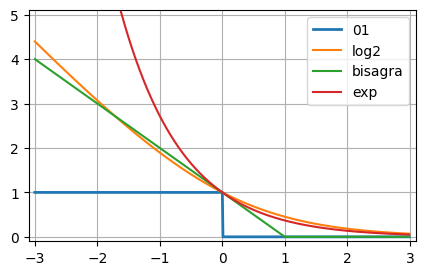

In [2]:
import numpy as np; import matplotlib.pyplot as plt
x = np.arange(-3, 3, .01); fig = plt.figure(figsize=(5, 3))
plt.axis([-3.1, 3.1, -0.1, 5.1]); plt.grid()
plt.plot(x, x<=0, linewidth=2, label='01')
plt.plot(x, np.log2(1 + np.exp(-x)), label='log2')
plt.plot(x, (1-x).clip(min=0), label='bisagra')
plt.plot(x, np.exp(-x), label='exp'); plt.legend();

# 3 Regularización

## 3.1 Definición

### 3.1.1 Regularización

**Sobre-entrenamiento (overfitting):** $\;$ problema fundamental de MLE y, en general, ERM, asociado a la minimización de la pérdida sobre los datos de entrenamiento, ya que conduce a modelos **sobre-entrenados** que **no generalizan** (bien)

**Ejemplo de overfitting:** $\;$ probabilidad de obtener cara al lanzar una moneda
* Lanzamos la moneda $N=3$ veces y obtenemos $3$ caras
* El MLE es $\,\hat{\theta}_{\text{mle}}=N_1/(N_0+N_1)=3/(0+3)=1$
* Si usamos $\operatorname{Ber}(y\mid\hat{\theta}_{\text{mle}})$ para predecir, predeciremos cara en todos los lanzamientos futuros, cosa bastante inverosímil

**Muchos parámetros suele conducir a overfitting:** $\;$ ya que el modelo tiene suficientes parámetros para explicar los datos, por lo que acaba pareciéndose mucho a la empírica y no es capaz de generalizar

**Regularización:** $\;$ añade una **penalización (penalty)** a la pérdida mediante alguna forma de **penalización de complejidad** $C(\boldsymbol{\theta})$ cuyo peso depende de un **parámetro de regularización** $\,\lambda\geq 0$
$$\mathcal{L}(\boldsymbol{\theta};\lambda)=\left[\frac{1}{N}\sum_n \ell(\boldsymbol{y}_n,\boldsymbol{\theta};\boldsymbol{x}_n)\right]+\lambda\,C(\boldsymbol{\theta})$$

**Penalización de complejidad usual:** $\;C(\boldsymbol{\theta})=-\log p(\boldsymbol{\theta})\,$ donde $p(\boldsymbol{\theta})$ es un **prior** más o menos plano

### 3.1.2 Estimación maximum a posteriori (MAP)

$$\begin{align*}
\hat{\boldsymbol{\theta}}_{\text{map}}%
&=\operatorname*{argmax}_{\boldsymbol{\theta}}\;\log p(\boldsymbol{\theta}\mid\mathcal{D})%
&&\text{asumimos}\quad p(\boldsymbol{\theta}\mid\mathcal{D})=\delta(\boldsymbol{\theta}-\hat{\boldsymbol{\theta}}_{\text{map}})\\%
&=\operatorname*{argmax}_{\boldsymbol{\theta}}\;\log p(\mathcal{D}\mid\boldsymbol{\theta})+\log p(\boldsymbol{\theta})\\
&=\operatorname*{argmin}_{\boldsymbol{\theta}}\;-\frac{1}{N}\log p(\mathcal{D}\mid\boldsymbol{\theta})-\frac{1}{N}\log p(\boldsymbol{\theta})\\
&=\operatorname*{argmin}_{\boldsymbol{\theta}}\;\operatorname{NLL}(\boldsymbol{\theta})-\lambda\log p(\boldsymbol{\theta})%
&&\text{con log-pérdida y}\,\lambda=\frac{1}{N}
\end{align*}$$

## 3.2 Elección del regularizador mediante validación

**Efecto del parámetro de regularización $\lambda$:**
* **$\lambda$ demasiado pequeño:** $\;$ equivale a minimizar el riesgo empírico y acabar con un modelo **sobre-ajustado**
* **$\lambda$ demasiado grande:** $\;$ equivale a no desviarse mucho del prior y acabar con un modelo **sub-ajustado**

**Validación:** $\;$ método más popular y sencillo para escoger $\lambda$
* Dividimos los datos en un conjunto de **entrenamiento** $\,\mathcal{D}_{\text{train}}\,$ y otro de **validación o desarrollo** $\,\mathcal{D}_{\text{valid}}$
* Por cada valor de interés de $\lambda$, el modelo se ajusta con $\mathcal{D}_{\text{train}}$ y se evalúa en validación
* Elegimos el $\lambda$ que proporciona mejor rendimiento en validación

**Validación con más detalle:**
* Riesgo empírico regularizado con un conjunto de datos $\mathcal{D}$: $\quad R_{\lambda}(\boldsymbol{\theta},\mathcal{D})=\frac{1}{\lvert\mathcal{D}\rvert}\sum_{(\boldsymbol{x},\boldsymbol{y})\in\mathcal{D}}\ell(\boldsymbol{y},f(\boldsymbol{x};\boldsymbol{\theta}))+\lambda\,C(\boldsymbol{\theta})$
* Por cada valor de interés de $\lambda$, obtenemos el estimador: $\quad\hat{\boldsymbol{\theta}}_{\lambda}(\mathcal{D}_{\text{train}})=\operatorname*{argmin}\nolimits_{\boldsymbol{\theta}} R_{\lambda}(\boldsymbol{\theta},\mathcal{D}_{\text{train}})$
* **Riesgo poblacional estimado como riesgo en validación:** $\quad R_{\lambda}^{\text{val}}=R_0(\hat{\boldsymbol{\theta}}_{\lambda}(\mathcal{D}_{\text{train}}),\mathcal{D}_{\text{valid}})$
* Escogemos el regularizador óptimo en validación: $\quad\lambda^*=\operatorname*{argmin}\nolimits_{\lambda\in\mathcal{S}}\;R_{\lambda}^{\text{val}}$
* Finalmente reajustamos el modelo con todo $\mathcal{D}=\mathcal{D}_{\text{train}}\cup\mathcal{D}_{\text{valid}}$: $\quad\hat{\boldsymbol{\theta}}^*=\operatorname*{argmin}_{\boldsymbol{\theta}}\;R_{\lambda^*}(\boldsymbol{\theta},\mathcal{D})$

## 3.3 Validación cruzada

**Cross validation (CV):** $\;$ divide los datos en $K$ bloques y, por cada bloque $k\in\{1,\dotsc,K\}$, ajusta el modelo con todos los bloques menos el $k$-ésimo, el cual se usa como conjunto de validación
$$R_{\lambda}^{\text{CV}}=\frac{1}{K}\sum\nolimits_k R_0(\hat{\boldsymbol{\theta}}_{\lambda}(\mathcal{D}_{-k}),\mathcal{D}_k)$$

**Ejemplo:** $\;$ validación cruzada con $K=5$ bloques
<div><img src="Figure_4.6.png" width="400"></div>

**Leave-one-out (LOO) cross validation:** $\;$ CV con $K=N$

**Uso de CV:** $\;$ hallamos un $\lambda$ òptimo, $\hat{\lambda}$, y luego re-estimamos $\boldsymbol{\theta}$ con todos los datos y $\hat{\lambda}$
$$\hat{\lambda}=\operatorname*{argmin}_{\lambda}\;R_{\lambda}^{\text{CV}}%
\qquad\text{y, luego,}\qquad%
\hat{\boldsymbol{\theta}}=\operatorname*{argmin}_{\boldsymbol{\theta}}\;R_{\hat{\lambda}}(\boldsymbol{\theta},\mathcal{D})$$

### 3.3.1 La regla "un error estándar"

**Propósito:** $\;$ añadir una medida de incertidumbre el estimador CV del riesgo

**Error estándar de la media:** $\;$ a partir del estimador CV del riesgo de cada muestra $n$, $\,L_n=\ell(\boldsymbol{y}_n,f(\boldsymbol{x}_n;\hat{\boldsymbol{\theta}}_{\lambda}(\mathcal{D}_{-n})))$
$$\operatorname{se}(\hat{\mu})=\frac{\hat{\sigma}}{\sqrt{N}}%
\qquad\text{donde}\qquad%
\hat{\mu}=\frac{1}{N}\sum\nolimits_n L_n%
\quad\text{y}\quad%
\hat{\sigma}^2=\frac{1}{N}\sum\nolimits_n (L_n-\hat{\mu})^2$$

**One-standard error rule:** $\;$ se emplea para la selección de un modelo entre varios candidatos
* Primero se aplica CV a cada modelo, obteniéndose la media y error estándar (de la media) a partir de sus riesgos estimados
* Se selecciona el modelo más simple cuyo riesgo no sea mayor que un error estándar por encima del riesgo del mejor modelo

### 3.3.2 Ejemplo: regresión de cresta

* Izquierda: el MSE de test tiene forma de U; primero decrece al aumentar $\lambda$, pero luego crece a causa del subajuste
* Derecha: MSE estimado con $5$-bloques CV y error estándar de la media en barras verticales; mínimo cercano al óptimo en test

<div><img src="polyfitRidgeUcurve.png" width="400"><img src="polyfitRidgeCV.png" width="400"></div>

## 3.4 Terminación temprana

**Asunción:** $\;$ el ajuste de parámetros se realiza mediante un algoritmo de optimización iterativa

**Early stopping:** $\;$ valida el rendimiento del modelo tras cada iteración y termina antes de convergencia si se observa sobre-entrenamiento

**Ejemplo:** $\;$ pérdida y precisión de un clasificador de texto en IMDB

<div><img src="imdb-loss.png" width="400"><img src="imdb-acc.png" width="400"></div>

## 3.5 Uso de más datos

**Datos y sobre-ajuste:** $\;$ dado un un modelo de complejidad fija, la posibilidad de sobre-ajuste decrece al aumentar los datos

**Ejemplo:** $\;$ MSE en train y test de en función de $N$, para regresión de cresta con modelos de diferente complejidad

<div><img src="polyfitN1.png" width="400"><img src="polyfitN2.png" width="400"></div>
<div><img src="polyfitN10.png" width="400"><img src="polyfitN20.png" width="400"></div>